In [1]:
import numpy as np
import os, h5py
import matplotlib.pyplot as plt

In [2]:
simulation_folder = r"F:\little_fish_simulation_logs"
generation_range = [0, 50]

In [3]:
gen_lst = list(range(generation_range[0], generation_range[1]))
lifespan_arr = np.zeros((1000, len(gen_lst)), dtype=int)


In [4]:
for gen_idx, gen in enumerate(gen_lst):

    print(f"processing generation {gen} ...")

    gen_folder = os.path.join(simulation_folder, f"generation_{gen:07d}")

    curr_lifespans = []

    for fn in os.listdir(gen_folder):
        if fn[0:5] == 'fish_' and fn[-5:] == '.hdf5':
            curr_f = h5py.File(os.path.join(gen_folder, fn), 'r')
            sim_n = [s for s in curr_f.keys() if s[:11] == 'simulation_']
            if len(sim_n) != 1:
                raise ValueError('number of simulation for fish ({}) does not '
                                'equal one'.format(curr_f['fish/name'][()]))
            sim_n = sim_n[0]
            curr_lifespans.append(curr_f[sim_n]['simulation_log/last_time_point'][()])
            curr_f.close()
    
    lifespan_arr[:, gen_idx] = np.array(curr_lifespans)


processing generation 0 ...
processing generation 1 ...
processing generation 2 ...
processing generation 3 ...
processing generation 4 ...
processing generation 5 ...
processing generation 6 ...
processing generation 7 ...
processing generation 8 ...
processing generation 9 ...
processing generation 10 ...
processing generation 11 ...
processing generation 12 ...
processing generation 13 ...
processing generation 14 ...
processing generation 15 ...
processing generation 16 ...
processing generation 17 ...
processing generation 18 ...
processing generation 19 ...
processing generation 20 ...
processing generation 21 ...
processing generation 22 ...
processing generation 23 ...
processing generation 24 ...
processing generation 25 ...
processing generation 26 ...
processing generation 27 ...
processing generation 28 ...
processing generation 29 ...
processing generation 30 ...
processing generation 31 ...
processing generation 32 ...
processing generation 33 ...
processing generation 34

In [5]:
mother_lifespan_arr = np.zeros((400, len(gen_lst)))
for gen_idx, gen in enumerate(gen_lst):
    curr_lifespans = sorted(lifespan_arr[:, gen_idx].copy())
    mother_lifespan_arr[:, gen_idx] = curr_lifespans[-400:]

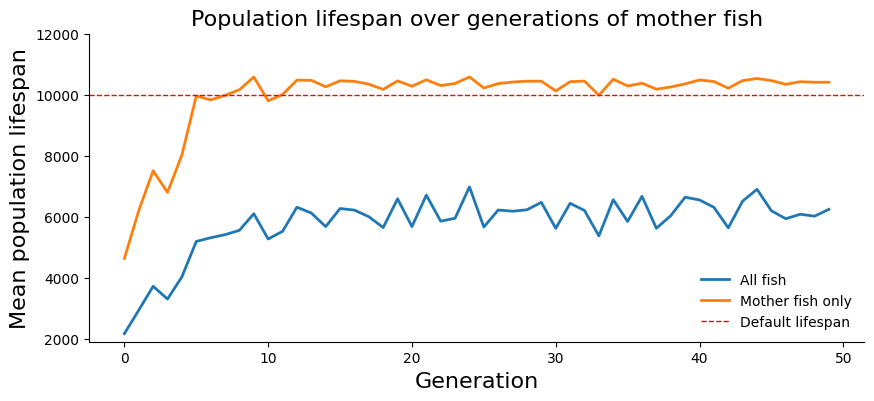

In [9]:
mean_lifespans = np.mean(lifespan_arr, axis=0)
mean_lifespans_m = np.mean(mother_lifespan_arr, axis=0)

f, ax = plt.subplots(figsize=(10, 4))
ax.plot(gen_lst, mean_lifespans, label="All fish", lw=2)
ax.plot(gen_lst, mean_lifespans_m, label="Mother fish only", lw=2)
ax.axhline(y=10000, ls="--", c="r", lw=1, label="Default lifespan")
ax.set_xlabel("Generation", fontsize=16)
ax.set_ylabel("Mean population lifespan", fontsize=16)
ax.set_title("Population lifespan over generations of mother fish", fontsize=16)
ax.legend(frameon=False)
ax.set_ylim(1900, 12000)
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)